In [ ]:
# %pip install pandas
# %pip install seaborn
# %pip install matplotlib
# %pip install prettytable
# %pip install scikit-learn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn import metrics
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures


accuracies = {}

def perform_prediction(model, x_train, y_train, x_test, y_test, method, print_coefficients=False):
    model.fit(x_train, y_train)
    if print_coefficients:
        print("Coefficients: \n", model.coef_)
        _ = [print(k, v) for k, v in zip(x_train.columns, model.coef_[0])]
        print("Intercept: \n", model.intercept_)

    y_pred = model.predict(x_test)

    score = metrics.accuracy_score(y_test, y_pred)
    print(f"Score: {score}")

    ax = plt.axes()
    sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
    ax.set_title(method)
    plt.show()

    global accuracies
    accuracies[method] = score


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.1_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.1_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.1_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.1_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available:

In [13]:
path_to_csv = '/Users/lagovs/Documents/задания на лабы/ML3.1 classification/data/diabetes.csv'
data = pd.read_csv(path_to_csv)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)
y.shape, X.shape

((768,), (768, 8))

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.25, shuffle=True)

/opt/homebrew/Cellar/jupyterlab/4.3.1_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Coefficients: 
 [[ 1.16546528e-01  3.07211577e-02 -1.09237803e-02  7.01315268e-04
  -1.45349314e-03  1.01425346e-01  1.16444304e+00  2.68914496e-02]]
Pregnancies 0.11654652750199357
Glucose 0.0307211576669078
BloodPressure -0.010923780273400963
SkinThickness 0.0007013152675771619
Insulin -0.0014534931445619327
BMI 0.10142534594980161
DiabetesPedigreeFunction 1.1644430371378338
Age 0.026891449638815918
Intercept: 
 [-8.84398505]
Score: 0.7864583333333334


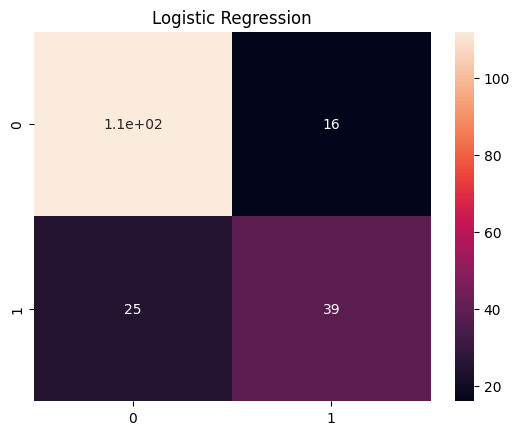

In [18]:
perform_prediction(LogisticRegression(), x_train, y_train, x_test, y_test, "Logistic Regression", print_coefficients=True)

Score: 0.6927083333333334


/opt/homebrew/Cellar/jupyterlab/4.3.1_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


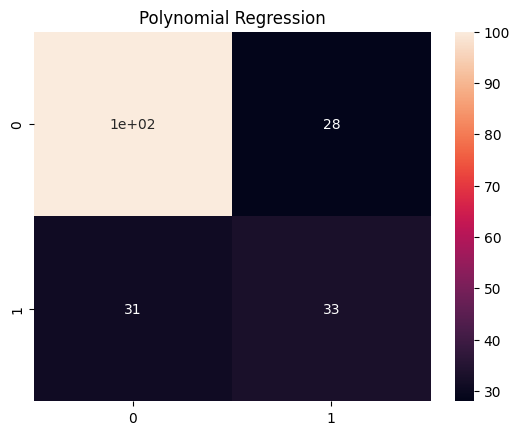

In [19]:
poly = PolynomialFeatures(2)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.fit_transform(x_test)

perform_prediction(LogisticRegression(), x_poly_train, y_train, x_poly_test, y_test, "Polynomial Regression")

Score: 0.7760416666666666


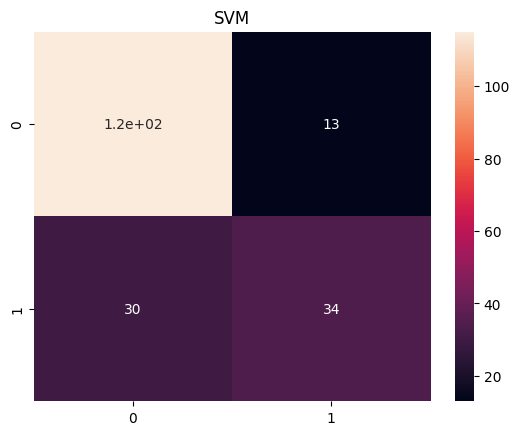

In [20]:
perform_prediction(svm.SVC(), x_train, y_train, x_test, y_test, "SVM")

Score: 0.6770833333333334


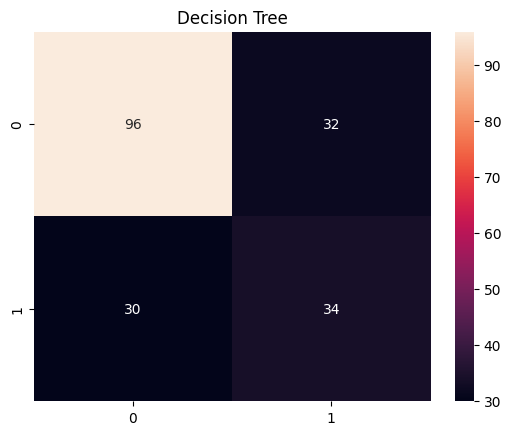

In [21]:
perform_prediction(DecisionTreeClassifier(), x_train, y_train, x_test, y_test, "Decision Tree")

Score: 0.75


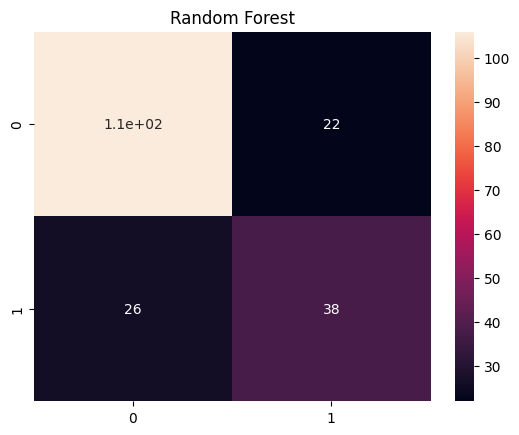

In [22]:
perform_prediction(RandomForestClassifier(), x_train, y_train, x_test, y_test, "Random Forest")

Score: 0.6614583333333334


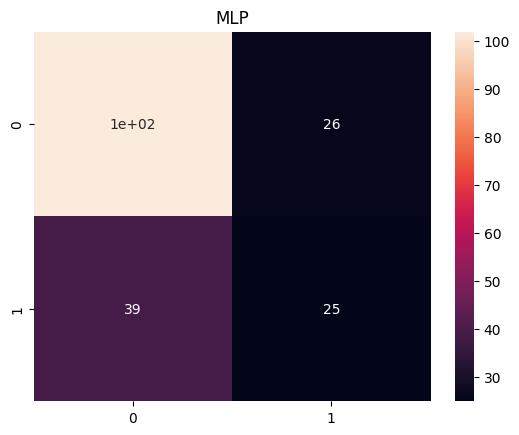

In [23]:
perform_prediction(MLPClassifier(), x_train, y_train, x_test, y_test, "MLP")

In [24]:
table = PrettyTable()
table.field_names = ["Метод", "Оценка точности"]
for method in accuracies.keys():
    table.add_row([method, round(accuracies[method],5)])
print(table)

+-----------------------+-----------------+
|         Метод         | Оценка точности |
+-----------------------+-----------------+
|  Logistic Regression  |     0.78646     |
| Polynomial Regression |     0.69271     |
|          SVM          |     0.77604     |
|     Decision Tree     |     0.67708     |
|     Random Forest     |       0.75      |
|          MLP          |     0.66146     |
+-----------------------+-----------------+
